In [18]:
# This is an implementation of the suggestion in the exercise help document 
# 
import keras 
import gc

class CleanUpCallback(keras.callbacks.Callback):

  # Callback after each epoch
  def on_epoch_end(self,epochs,logs=None):
    # print(f"Loss: {logs['loss']}")
    print("Cleaning up after each epoch to save memory")
    gc.collect()

In [19]:
# import Dataset from given link
# Get dataset from keras 
from keras.datasets import mnist
import matplotlib.pyplot as plt 
import sys
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.callbacks import EarlyStopping
import numpy as np
import tensorflow as tf

In [3]:
# Preparing data for processing
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset 
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# One hot encode label values
trainy = tf.one_hot(trainy.astype(np.int32), depth=10)
testy = tf.one_hot(testy.astype(np.int32), depth=10)
# Normalize the input values for the training and testing data
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = trainX_norm / 255.0
test_norm = testX_norm / 255.0 


11501568/11490434 [==============================] - 0s 0us/step


In [7]:

# define a function to create model
# Define our model and configure it with the desired architecture
# Choosing 32 filters with a filter size of 3x3 and a stride of 1
# Initialize the model
# scores =[]
functions = ['sigmoid','relu','elu','selu','tanh']
def create_model(node_function):
    model = Sequential()
    # Add a convolution layer
    model.add(Conv2D(32, (3, 3), activation=node_function, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Add a pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Add another conv layer
    model.add(Conv2D(32, (3, 3), activation=node_function, kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation=node_function, kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # Configure the model
    model.compile(tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['accuracy'])
    # Configure Early Stopping callback
    es = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')    
    # Train the model
    history = model.fit(train_norm, trainy, epochs=25, batch_size=128, verbose=1,validation_split=0.2,callbacks=[CleanUpCallback(),es])
    model.save(f"models/mnist_{node_function}")
    # scores.append(history)
    print(model.summary())
    return model,history


Creating model...
Training model...
Epoch 1/25
375/375 [==============================] - 6s 13ms/step - loss: 1.0191 - accuracy: 0.7020 - val_loss: 0.3060 - val_accuracy: 0.9168
Epoch 2/25
375/375 [==============================] - 4s 12ms/step - loss: 0.2288 - accuracy: 0.9350 - val_loss: 0.1745 - val_accuracy: 0.9493
Epoch 3/25
375/375 [==============================] - 4s 11ms/step - loss: 0.1297 - accuracy: 0.9622 - val_loss: 0.1077 - val_accuracy: 0.9696
Epoch 4/25
375/375 [==============================] - 4s 11ms/step - loss: 0.0932 - accuracy: 0.9725 - val_loss: 0.0746 - val_accuracy: 0.9769
Epoch 5/25
375/375 [==============================] - 4s 11ms/step - loss: 0.0745 - accuracy: 0.9772 - val_loss: 0.0672 - val_accuracy: 0.9803
Epoch 6/25
375/375 [==============================] - 4s 11ms/step - loss: 0.0627 - accuracy: 0.9804 - val_loss: 0.0605 - val_accuracy: 0.9812
Epoch 7/25
375/375 [==============================] - 4s 11ms/step - loss: 0.0541 - accuracy: 0.9834 - val

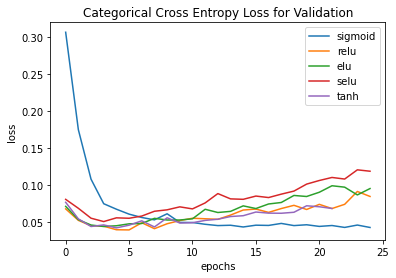

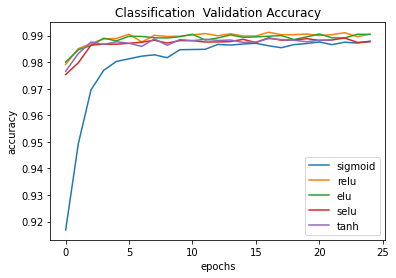

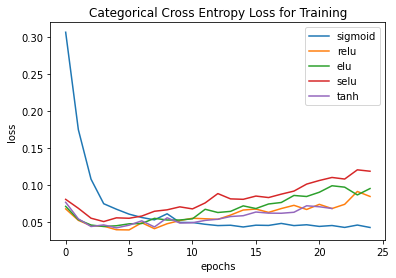

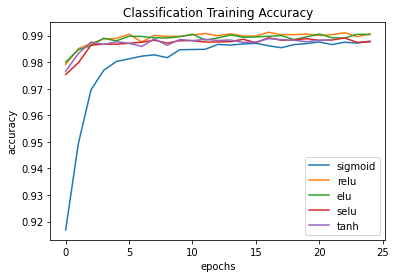

In [10]:
# Main entry point for training model

if __name__ == "__main__":
    
    print("Creating model...")
    # List for validation accuracy
    acc = []
    # List for validation loss
    loss = []
    # List for training accuracy and training loss
    train_acc = []
    train_loss = []
    for function in functions:
      print("Training model...")
      model,history = create_model(node_function=function)
      # Plot the accuracy
      print("Storing scores...")
      # Store validation accuracy and loss 
      loss.append(history.history["val_loss"])
      acc.append(history.history["val_accuracy"])
      # Store training accuracy and loss
      train_loss.append(history.history["loss"])
      train_acc.append(history.history["accuracy"])

    plt.plot(loss[0],label=functions[0])
    plt.plot(loss[1],label=functions[1])
    plt.plot(loss[2],label=functions[2])
    plt.plot(loss[3],label=functions[3])
    plt.plot(loss[4],label=functions[4])
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Categorical Cross Entropy Loss for Validation")
    plt.savefig("mnist_node_function_validation_loss_plot.png")
    plt.legend()  
    plt.show()

    plt.plot(acc[0],label=functions[0])
    plt.plot(acc[1],label=functions[1])
    plt.plot(acc[2],label=functions[2])
    plt.plot(acc[3],label=functions[3])
    plt.plot(acc[4],label=functions[4])
    plt.title("Classification  Validation Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.savefig("mnist_node_function_validation_accuracy_plot.png")
    plt.legend()  
    plt.show()          


    plt.plot(loss[0],label=functions[0])
    plt.plot(loss[1],label=functions[1])
    plt.plot(loss[2],label=functions[2])
    plt.plot(loss[3],label=functions[3])
    plt.plot(loss[4],label=functions[4])
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Categorical Cross Entropy Loss for Training")
    plt.savefig("mnist_node_function_training_loss_plot.png")
    plt.legend()  
    plt.show()

    plt.plot(acc[0],label=functions[0])
    plt.plot(acc[1],label=functions[1])
    plt.plot(acc[2],label=functions[2])
    plt.plot(acc[3],label=functions[3])
    plt.plot(acc[4],label=functions[4])
    plt.title("Classification Training Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.savefig("mnist_node_function_training_accuracy_plot.png")
    plt.legend()  
    plt.show()          


In [13]:
# Testing the model to find the loss score
from tensorflow.keras.models import load_model
import os
models_path = os.listdir("models/") 
scores = []
for model in models_path:
  model = load_model("models/"+model+"/")
  results = model.evaluate(test_norm,testy)
  scores.append(results)

313/313 [==============================] - 2s 4ms/step - loss: 0.0606 - accuracy: 0.9915


In [14]:
scores

[[0.03537735715508461, 0.9886999726295471],
 [0.08735236525535583, 0.989300012588501],
 [0.06985083967447281, 0.9908000230789185],
 [0.05453731119632721, 0.9894000291824341],
 [0.060550156980752945, 0.9915000200271606]]

In [17]:
for index,function in enumerate(functions):
  print(f"{function} model has classification accuracy:{scores[index][1]*100:.2f}% and classification error:{scores[index][0] *100:.2f}%")

sigmoid model has accuracy:98.87% and loss:3.54%
relu model has accuracy:98.93% and loss:8.74%
elu model has accuracy:99.08% and loss:6.99%
selu model has accuracy:98.94% and loss:5.45%
tanh model has accuracy:99.15% and loss:6.06%


In [20]:
# Second Part of the exercise begins here
# 
# CIFAR10  dataset 
# 
# 

In [21]:
# Needed libraries are imported here
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2


In [22]:
# Node functions to be used
functions = ['sigmoid','relu','elu','selu','tanh']

In [23]:
# load dataset
(trainX, trainY),(testX,testY) = cifar10.load_data()
# One hot encode label values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

170508288/170498071 [==============================] - 2s 0us/step


In [31]:
# Normalize the input values for the training and testing data
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = trainX_norm / 255.0
test_norm = testX_norm / 255.0 

In [34]:
test_norm.shape 


(10000, 32, 32, 3)

In [25]:
# define a function to create model
# Define our model and configure it with the desired architecture
# Choosing 32 filters with a filter size of 3x3 and a stride of 1 for the first Conv layer
# 64 filters with filter size of 3x3 and a stride of 1 for the second Conv layer
# Initialize the model
# scores =[]
def create_model(node_function):
    model = Sequential()
    # Add a convolution layer
    model.add(Conv2D(32, (3, 3), activation=node_function, kernel_initializer='he_uniform', padding='same' , kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
    # Add a pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Add another conv layer
    model.add(Conv2D(64, (3, 3), activation=node_function, kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation=node_function, kernel_initializer='he_uniform',  kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # Configure the model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Configure Early Stopping callback
    es = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')    
    # Train the model
    history = model.fit(train_norm, trainY, epochs=50, batch_size=128, verbose=1,validation_split=0.2,callbacks=[CleanUpCallback(),es])
    model.save(f"models/cifar10/cifar10_{node_function}")
    # scores.append(history)
    # Print model summary for documentation
    model.summary()
    return model,history


Creating model...
Training model...
Epoch 1/50
313/313 [==============================] - 6s 15ms/step - loss: 2.3672 - accuracy: 0.1711 - val_loss: 2.1343 - val_accuracy: 0.2583
Epoch 2/50
313/313 [==============================] - 4s 13ms/step - loss: 2.0593 - accuracy: 0.2934 - val_loss: 2.0164 - val_accuracy: 0.3032
Epoch 3/50
313/313 [==============================] - 4s 14ms/step - loss: 1.9811 - accuracy: 0.3302 - val_loss: 1.9355 - val_accuracy: 0.3475
Epoch 4/50
313/313 [==============================] - 4s 13ms/step - loss: 1.9043 - accuracy: 0.3650 - val_loss: 1.8929 - val_accuracy: 0.3633
Epoch 5/50
313/313 [==============================] - 4s 14ms/step - loss: 1.8662 - accuracy: 0.3814 - val_loss: 1.8647 - val_accuracy: 0.3835
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 1.8292 - accuracy: 0.3971 - val_loss: 1.8283 - val_accuracy: 0.3961
Epoch 7/50
313/313 [==============================] - 4s 14ms/step - loss: 1.8119 - accuracy: 0.4062 - val

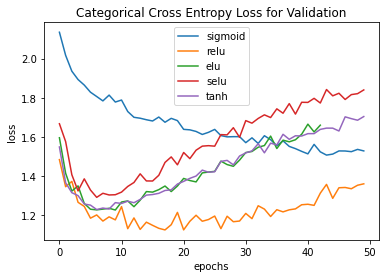

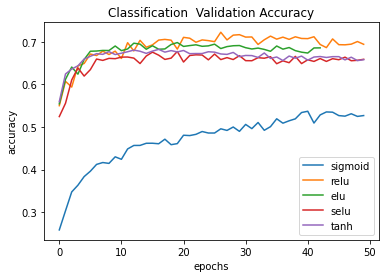

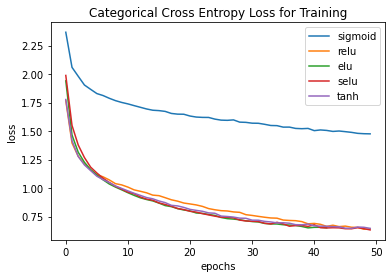

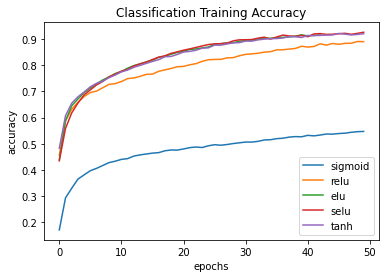

In [26]:
if __name__ == "__main__":

    functions = ['sigmoid','relu','elu','selu','tanh']
    print("Creating model...")
    # Lists to hold validation losses and accuracy
    losses = []
    accuracy = []
    train_loss = []
    train_acc = []
    for function in functions:
      print("Training model...")
      model,history = create_model(node_function=function)

      print("Storing scores...")
      # Store validation accuracy and loss 
      losses.append(history.history["val_loss"])
      accuracy.append(history.history["val_accuracy"])
      # Store training accuracy and loss
      train_loss.append(history.history["loss"])
      train_acc.append(history.history["accuracy"])

    plt.plot(losses[0],label=functions[0])
    plt.plot(losses[1],label=functions[1])
    plt.plot(losses[2],label=functions[2])
    plt.plot(losses[3],label=functions[3])
    plt.plot(losses[4],label=functions[4])
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Categorical Cross Entropy Loss for Validation")
    plt.savefig("cifar10_node_function_validation_loss_plot.png")
    plt.legend()  
    plt.show()

    plt.plot(accuracy[0],label=functions[0])
    plt.plot(accuracy[1],label=functions[1])
    plt.plot(accuracy[2],label=functions[2])
    plt.plot(accuracy[3],label=functions[3])
    plt.plot(accuracy[4],label=functions[4])
    plt.title("Classification  Validation Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.savefig("cifar10_node_function_validation_accuracy_plot.png")
    plt.legend()  
    plt.show()          


    plt.plot(train_loss[0],label=functions[0])
    plt.plot(train_loss[1],label=functions[1])
    plt.plot(train_loss[2],label=functions[2])
    plt.plot(train_loss[3],label=functions[3])
    plt.plot(train_loss[4],label=functions[4])
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Categorical Cross Entropy Loss for Training")
    plt.savefig("cifar10_node_function_training_loss_plot.png")
    plt.legend()  
    plt.show()

    plt.plot(train_acc[0],label=functions[0])
    plt.plot(train_acc[1],label=functions[1])
    plt.plot(train_acc[2],label=functions[2])
    plt.plot(train_acc[3],label=functions[3])
    plt.plot(train_acc[4],label=functions[4])
    plt.title("Classification Training Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.savefig("cifar10_node_function_training_accuracy_plot.png")
    plt.legend()  
    plt.show()          


In [ ]:
# Testing the model to find the loss score
from tensorflow.keras.models import load_model
import os
models_path = os.listdir("models/cifar10") 
cifar10_scores = []
for model in models_path:
  model = load_model("models/cifar10/"+model+"/")
  results = model.evaluate(test_norm,testY,batch_size=256)
  cifar10_scores.append(results)

In [ ]:
# Printing out all the models and respective classification error rates and accuracies
for index,function in enumerate(functions):
  print(f"{function} model has classification accuracy:{cifar10_scores[index][1]*100:.2f}% and classification error:{cifar10_scores[index][0] *100:.2f}%")